# Readability Exercise

Welcome! Below you will implement two metrics for evaluating the readability of documents:

1. Flesch–Kincaid readability Grade Index 
2. Gunning Fog Index

The solutions are in [readability_solutions.py](./readability_solutions.py). You can also click the jupyter icon to see all the files in the folder.

To load all the functions in the solutions, simply include `from solutions import *`

## 0. Initialization

Let's read-in our text files. We have three different texts files to play with: 

1. `physics.txt`: taken from a technical wikipedia article about a theoretical physics idea called [Supersymmetry](https://en.wikipedia.org/wiki/Supersymmetry)

2. `APPL_10k_2017.txt`: the 2017 10-K Item IA for APPLE INC, taken from the EDGAR website

3. `alice.txt`: Excerpts from "Alice in Wonderland", the novel is in the public domain and freely available

In [4]:
import requests
from bs4 import BeautifulSoup as Soup

In [8]:
# Get the HTML data from the 2020 10-K from Apple
link = 'https://www.sec.gov/Archives/edgar/data/320193/000032019320000096/0000320193-20-000096.txt'
filename = "AAPL_10k_2020.txt"

r = clean_soup(link)
section = extract_section(r)

In [10]:
section

'The business, financial condition and operating results of the Company can be affected by a number of factors, whether currently known or unknown, including but not limited to those described below, any one or more of which could, directly or indirectly, cause the Company’s actual financial condition and operating results to vary materially from past, or from anticipated future, financial condition and operating results. Any of these factors, in whole or in part, could materially and adversely affect the Company’s business, financial condition, operating results and stock price. Because of the following factors, as well as other factors affecting the Company’s financial condition and operating results, past financial performance should not be considered to be a reliable indicator of future performance, and investors should not use historical trends to anticipate results or trends in future periods. The Company’s business, results of operations, financial condition and stock price have

In [9]:
raw_10k = r.text

In [11]:
print(raw_10k[:2000])

0000320193-20-000096.txt : 20201030
0000320193-20-000096.hdr.sgml : 20201030
20201029180625
ACCESSION NUMBER:		0000320193-20-000096
CONFORMED SUBMISSION TYPE:	10-K
PUBLIC DOCUMENT COUNT:		99
CONFORMED PERIOD OF REPORT:	20200926
FILED AS OF DATE:		20201030
DATE AS OF CHANGE:		20201029

FILER:

	COMPANY DATA:	
		COMPANY CONFORMED NAME:			Apple Inc.
		CENTRAL INDEX KEY:			0000320193
		STANDARD INDUSTRIAL CLASSIFICATION:	ELECTRONIC COMPUTERS [3571]
		IRS NUMBER:				942404110
		STATE OF INCORPORATION:			CA
		FISCAL YEAR END:			0926

	FILING VALUES:
		FORM TYPE:		10-K
		SEC ACT:		1934 Act
		SEC FILE NUMBER:	001-36743
		FILM NUMBER:		201273977

	BUSINESS ADDRESS:	
		STREET 1:		ONE APPLE PARK WAY
		CITY:			CUPERTINO
		STATE:			CA
		ZIP:			95014
		BUSINESS PHONE:		(408) 996-1010

	MAIL ADDRESS:	
		STREET 1:		ONE APPLE PARK WAY
		CITY:			CUPERTINO
		STATE:			CA
		ZIP:			95014

	FORMER COMPANY:	
		FORMER CONFORMED NAME:	APPLE INC
		DATE OF NAME CHANGE:	20070109

	FORMER COMPANY:	
		FORMER CONFORM

In [12]:
with open(filename,"w") as f:
    f.write(section)

We can download many 10-K files simultaneously using below function:

In [1]:
# download some excerpts from 10-K files

from download10k import get_files

CIK = {'ebay': '0001065088', 'apple':'0000320193', 'sears': '0001310067'}
get_files(CIK['ebay'], 'EBAY')
get_files(CIK['apple'], 'AAPL')
get_files(CIK['sears'], 'SHLDQ')


downloading 10-Ks item 1A for CIK = 0001065088 ...
downloading 10-Ks item 1A for CIK = 0000320193 ...
downloading 10-Ks item 1A for CIK = 0001310067 ...
writing SHLDQ_10k_2017.txt...
writing SHLDQ_10k_2016.txt...
writing SHLDQ_10k_2015.txt...
writing SHLDQ_10k_2014.txt...


In [2]:
# sentences separated by ; are better viewed as multiple sentences
# join combines all the newlines in the file

f = open("physics.txt", "r")
text_phy=''.join(f).replace(';','.')

f = open("alice.txt", "r")
text_alice=''.join(f).replace(';','.')

f = open("AAPL_10k_2020.txt", "r")
text_10k=''.join(f).replace(';','.')


In [3]:
# check out some of the texts
print(text_10k[:500]+"...\n")
print(text_phy[:500]+"...\n")
print(text_alice[:500]+"...\n")

The business, financial condition and operating results of the Company can be affected by a number of factors, whether currently known or unknown, including but not limited to those described below, any one or more of which could, directly or indirectly, cause the Company’s actual financial condition and operating results to vary materially from past, or from anticipated future, financial condition and operating results. Any of these factors, in whole or in part, could materially and adversely a...

In particle physics, supersymmetry (SUSY) is a principle that proposes a relationship between two basic classes of elementary particles: bosons, which have an integer-valued spin, and fermions, which have a half-integer spin. A type of spacetime symmetry, supersymmetry is a possible candidate for undiscovered particle physics, and seen as an elegant solution to many current problems in particle physics if confirmed correct, which could resolve various areas where current theories are believ

## 1. Pre-processing
Here, we need to define functions that can split our texts into sentences, and split our sentences into words

In [4]:
# tokenize and clean the text
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from collections import Counter
from nltk.corpus import stopwords

from nltk import word_tokenize
from syllable_count import syllable_count


nltk.download('wordnet')

sno = SnowballStemmer('english')
wnl = WordNetLemmatizer()

from nltk.tokenize import RegexpTokenizer

# tokenizer that selects out non letter and non symbol (i.e. all alphabets)
word_tokenizer = RegexpTokenizer(r'[^\d\W]+')


def word_tokenize(sent):
    return [ w for w in word_tokenizer.tokenize(sent) if w.isalpha() ]

# for the sentence tokenizer
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

# you can tokenize sentences by calling
# sent_tokenize(document)

# and tokenize words by calling
# word_tokenize(sentence)

# syllable_count counts the number of syllables in a word
# it's included in syllable_count.py

[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Now implement three functions

1. `sentence_count`: a simple function that returns the number of sentences in a document

2. `word_count`: a simple function that returns the number of words in a sentence

3. `hard_word_count`: a simple function that returns the number of words with more than 3 syllables, while removing suffixes like "-ed", and "-ing". This can be done by lemmatizing the word, i.e. `wnl.lemmatize(word, pos='v')`

the function `word_tokenize(sentence)` will be useful here

In [5]:
from syllable_count import syllable_count
syllable_count("syllable")

3

In [6]:
def sentence_count(text):
    # TO DO
    sentences = sent_tokenize(text)
    
    return len(sentences)


def word_count(sent):
    # TO DO
    words = word_tokenize(sent)
    
    return len(words)


def hard_word_count(sent):
    # TO DO
    words = word_tokenize(sent)
    lemmed_m3 = [w for w in word_tokenize(sent) if \
                 syllable_count(wnl.lemmatize(w, pos='v')) >= 3] 
    
    return len(lemmed_m3)


## 2. Readability Grade-Levels

Here, you will implement the two readability indices (grade levels). They are defined by

\begin{align}
\textrm{Flesch–Kincaid Grade} 
= 0.39 \left(
\frac{\textrm{Number of words}}{\textrm{Number of sentences}}
\right) \\
+11.8
\left(
\frac{\textrm{Number of syllables}}{\textrm{Number of words}}
\right)
-15.59
\end{align}

and

\begin{align}
\textrm{Gunning-Fog Grade} 
=\; &0.4 \bigg[ 
\left(
\frac{\textrm{Number of words}}{\textrm{Number of sentences}}
\right) 
+100
\left(
\frac{\textrm{Number of hard words}}{\textrm{Number of words}}
\right)
\bigg]
\end{align}

To count syllables, we've added a syllable_count function you can access via 

```
from syllable_count import syllable_count
syllable_count("syllable")
```

Below, implement the function `flesch_index` and `fog_index` that computes the readability grade level for a given text.

In [9]:
import numpy as np

def flesch_index(text):
    # TO DO
    sentences = sent_tokenize(text)
    num_sent = len(sentences)
    num_words = sum([word_count(s) for s in sentences])
    num_syl = sum([syllable_count(w) for s in sentences for w in word_tokenize(s) ])
    
    flesch_index = 0.39*(num_words / num_sent) + \
    11.8*(num_syl / num_words) -15.59
    
    return flesch_index


def fog_index(text):
    # TO DO
    sentences = sent_tokenize(text)
    num_sent = len(sentences)
    num_words = sum([word_count(s) for s in sentences])
    num_hard_word = sum([hard_word_count(s) for s in sentences])
    
    fog_index = 0.4*((num_words / num_sent) + 100*(num_hard_word/num_words))
    
    return fog_index

## 3 Results

Now that you've coded up the exercises, compute the grade levels for each of the texts given.


In [10]:
# to test the solutions
# uncommon next line
# from readability_solutions import *

print(flesch_index(text_alice),fog_index(text_alice))
print(flesch_index(text_phy),fog_index(text_phy))
print(flesch_index(text_10k),fog_index(text_10k))

7.78094652406 9.736541889483068
16.3171712123 19.32253320005712
17.8181454425 21.24610974790008


You should expect a grade level around 7-10 for `alice.txt`, and around 16-19 for `physics.txt`, and 18+ for financial documents! 

It turns out 10-Ks are really *hard* to read legal documents!
Now, let's compute the readability for all the 10-Ks we have

In [11]:
filelist_10k=!ls *10k*txt


flesch = []
fog = []

for file in filelist_10k:
    with open(file, 'r') as f:
        text=''.join(f).replace(';','.')
        flesch.append(flesch_index(text))
        fog.append(fog_index(text))
        print(file, flesch[-1],fog[-1])

AAPL_10k_2020.txt 17.8181454425 21.24610974790008
SHLDQ_10k_2014.txt 16.6263736264 19.630769230769232
SHLDQ_10k_2015.txt 16.4517195224 18.897790482596267
SHLDQ_10k_2016.txt 16.8126305116 19.21544203165256
SHLDQ_10k_2017.txt 18.304118527 21.001601156700893


Superficially, and according to our readability metrics, reading 10-Ks is harder than reading articles on theoretical physics!

# Bonus exercise:
How are the two readability grade-levels correlated? Compute the covariance matrix of the two readability indices we have on all the 10K documents, and make a scatter plot of Flesch index vs Fog index. Also perform a least-squared fit to the result and plot it as well.

(change bottom cell to code and remove html tags for solution)

[[ 0.66004345  0.80416529]
 [ 0.80416529  1.13067726]]


Text(0,0.5,'Fog Index')

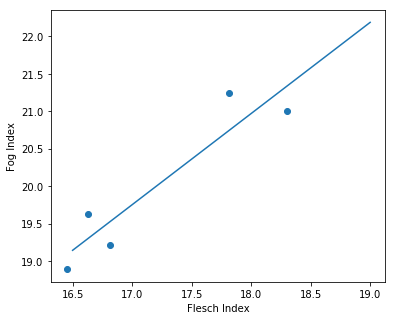

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


# TO DO
cov = np.cov(flesch,fog)
print(cov)

%matplotlib inline

plt.figure(figsize=(6,5))
plt.scatter(flesch,fog) 

slope, intercept, r_value, p_value, std_err = linregress(flesch, fog)

x=np.linspace(16.5,19,101)
y=slope*x+intercept
plt.plot(x,y)

plt.xlabel("Flesch Index")
plt.ylabel("Fog Index")

<font color="white">

#solution
cov = np.cov(flesch,fog)
print(cov)

%matplotlib inline

plt.figure(figsize=(6,5))
plt.scatter(flesch,fog) 

slope, intercept, r_value, p_value, std_err = linregress(flesch, fog)

x=np.linspace(16.5,19,101)
y=slope*x+intercept
plt.plot(x,y)

plt.xlabel("Flesch Index")
plt.ylabel("Fog Index")

</font>